# Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

Dataset for Problem: Election_Data.xlsx

## 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [512]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn 
import sklearn
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from scipy.stats import zscore

In [513]:
%cd

/Users/balask


In [514]:
import os
os.chdir('/Users/balask/Downloads/')

In [515]:
data_df= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes")

In [516]:
data_df=data_df.drop('Unnamed: 0',axis=1)

In [517]:
data_df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [518]:
data_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [519]:
data_df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [520]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [521]:
dups=data_df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
data_df[dups]

Total no of duplicate values = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [522]:
data_df.shape

(1525, 9)

In [523]:
print("the no of rows ",data_df.shape[0]," ", "the no of colums ",data_df.shape[1])

the no of rows  1525   the no of colums  9


In [524]:
data_df.vote.value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [526]:
for feature in data_df.columns:
    if data_df[feature].dtype=='object':
           print(feature.upper() ," ",data_df[feature].nunique())
           print(data_df[feature].value_counts().sort_values())

VOTE   2
Conservative     462
Labour          1063
Name: vote, dtype: int64
GENDER   2
male      713
female    812
Name: gender, dtype: int64


In [532]:
data_df1= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes")
data_df1=data_df1.drop('Unnamed: 0',axis=1)

In [533]:
data_df1['economic.cond.household']=data_df1['economic.cond.household'].astype(object)
data_df1['economic.cond.national']=data_df1['economic.cond.national'].astype(object)
data_df1['Blair']=data_df1['Blair'].astype(object)
data_df1['Hague']=data_df1['Hague'].astype(object)
data_df1['Europe']=data_df1['Europe'].astype(object)
data_df1['political.knowledge']=data_df1['political.knowledge'].astype(object)

In [534]:
data_df1.dtypes

vote                       object
age                         int64
economic.cond.national     object
economic.cond.household    object
Blair                      object
Hague                      object
Europe                     object
political.knowledge        object
gender                     object
dtype: object

## Univariate Analysis

/Users/balask/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/balask/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/balask/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/balask/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureW

Text(0.5, 1.0, 'gender Distribution')

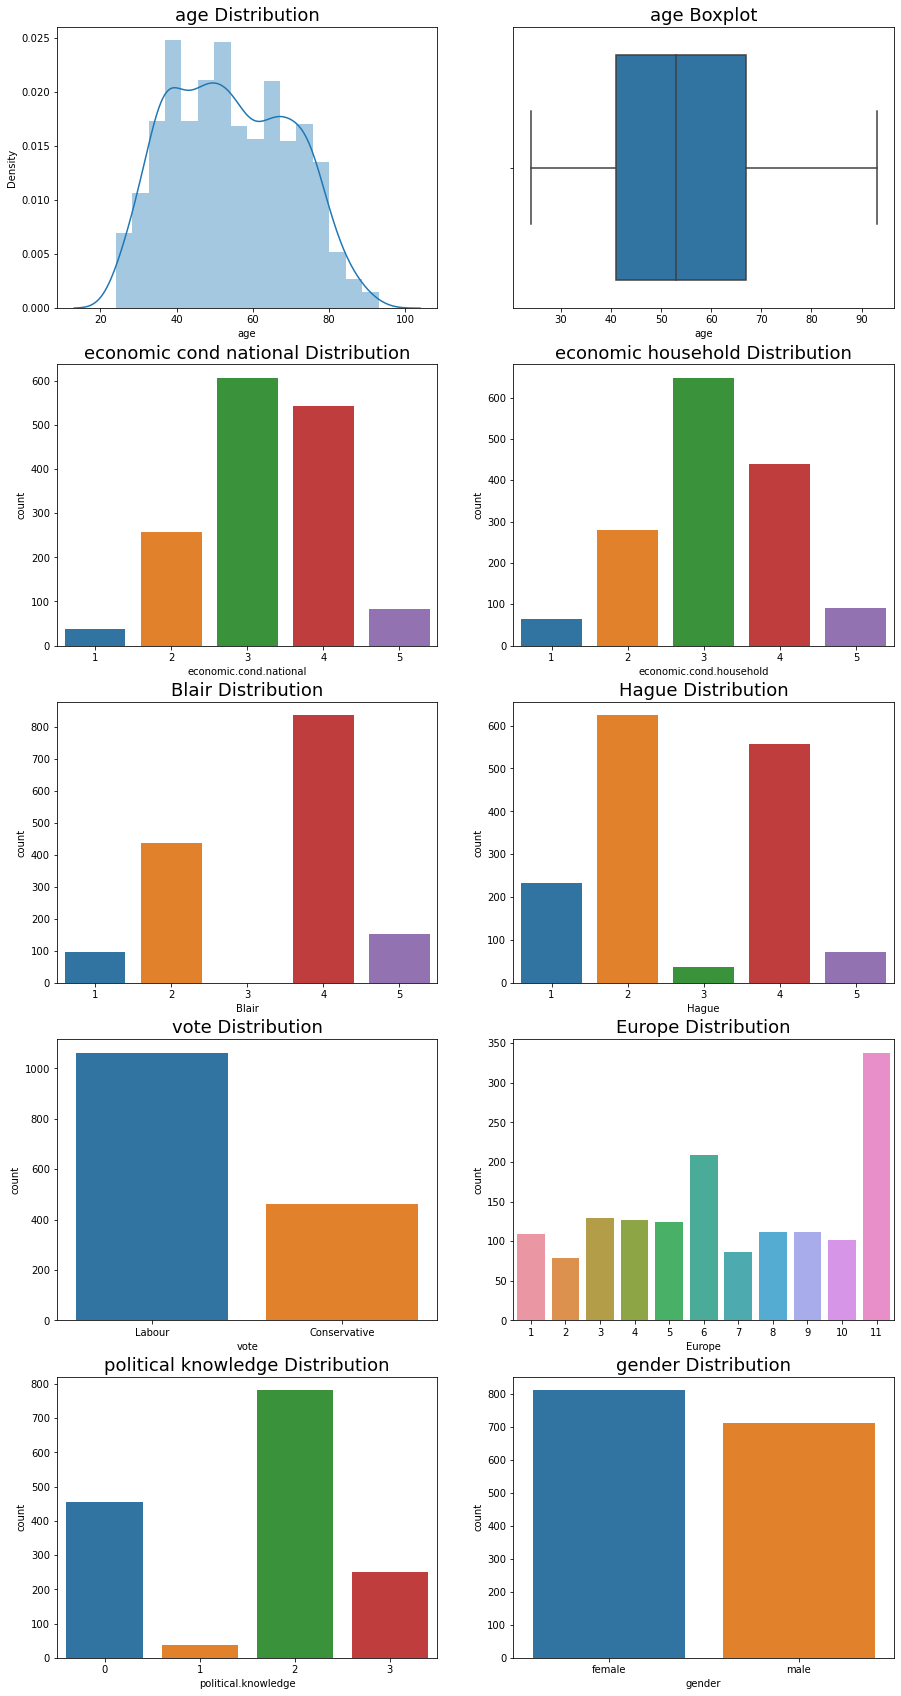

In [535]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(15,30)
a = sns.distplot(data_df1['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=18)

a = sns.boxplot(data_df1['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=18)

a=sns.countplot(data_df1['economic.cond.national'], ax=axes[1][0])
a.set_title("economic cond national Distribution",fontsize=18)

a=sns.countplot(data_df1['economic.cond.household'], ax=axes[1][1])
a.set_title("economic household Distribution",fontsize=18)

a=sns.countplot(data_df1['Blair'], ax=axes[2][0])
a.set_title("Blair Distribution",fontsize=18)

a=sns.countplot(data_df1['Hague'], ax=axes[2][1])
a.set_title("Hague Distribution",fontsize=18)

a=sns.countplot(data_df1['vote'], ax=axes[3][0])
a.set_title("vote Distribution",fontsize=18)

a=sns.countplot(data_df1['Europe'], ax=axes[3][1])
a.set_title("Europe Distribution",fontsize=18)

a=sns.countplot(data_df1['political.knowledge'], ax=axes[4][0])
a.set_title("political knowledge Distribution",fontsize=18)

a=sns.countplot(data_df1['gender'], ax=axes[4][1])
a.set_title("gender Distribution",fontsize=18)

## Bivariate and Multivariate Analysis

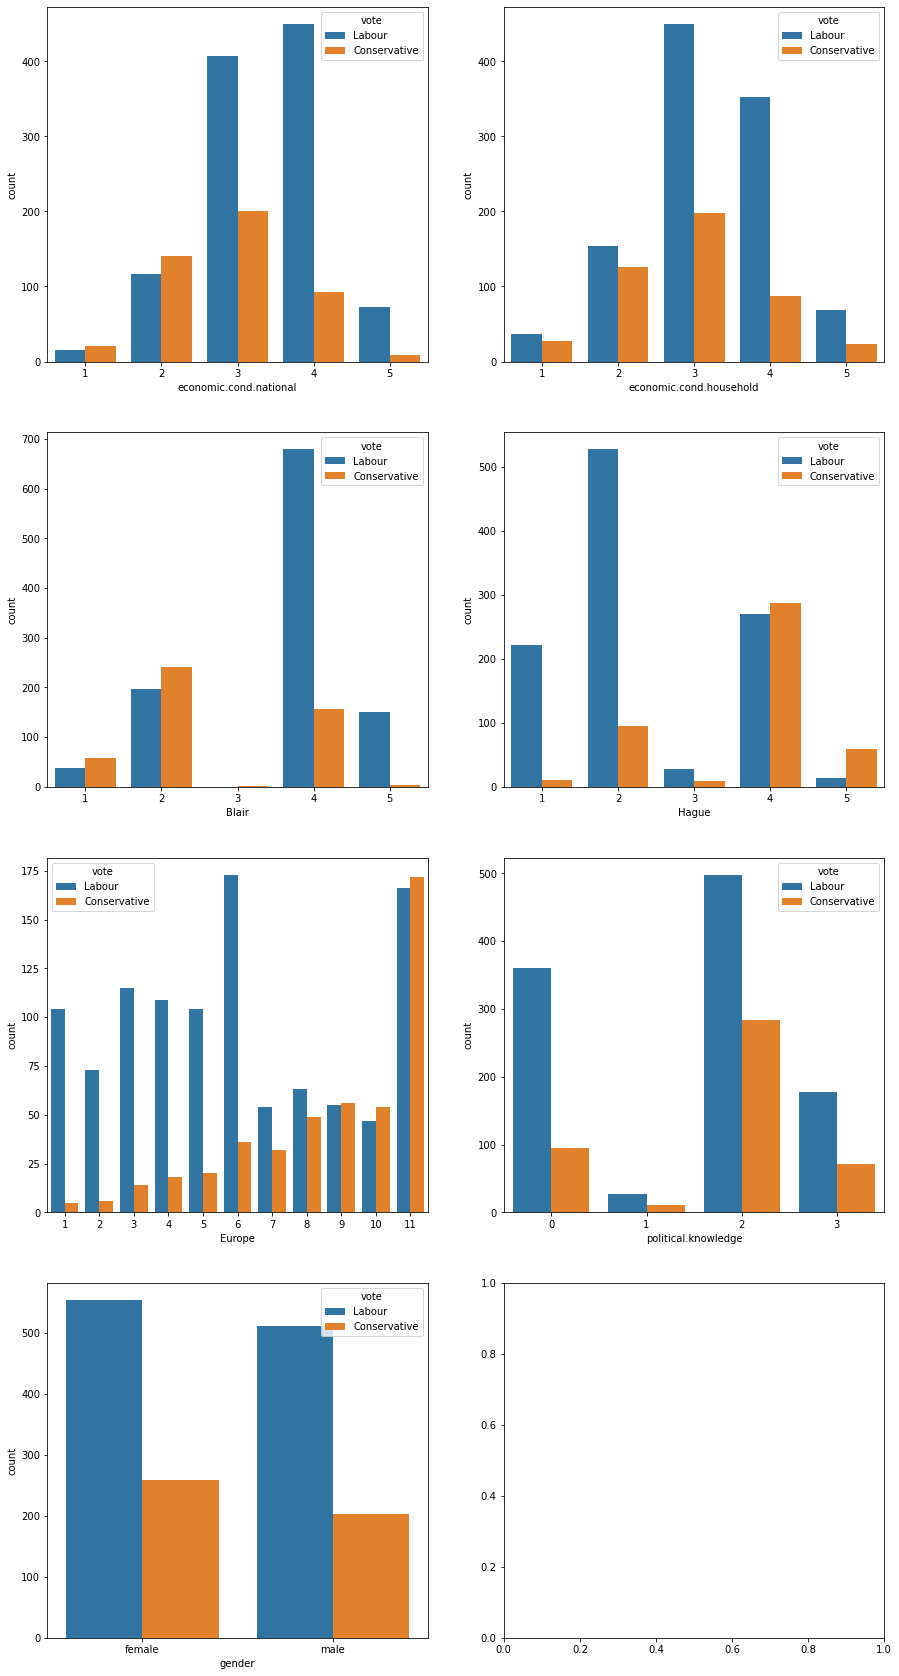

In [536]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,30)

a = sns.countplot(data=data_df1,x='economic.cond.national', hue='vote' , ax=axes[0][0])

a = sns.countplot(data=data_df1,x='economic.cond.household', hue='vote' , ax=axes[0][1])

a = sns.countplot(data=data_df1,x='Blair', hue='vote' , ax=axes[1][0])

a = sns.countplot(data=data_df1,x='Hague', hue='vote' , ax=axes[1][1])

a = sns.countplot(data=data_df1,x='Europe', hue='vote' , ax=axes[2][0])

a = sns.countplot(data=data_df1,x='political.knowledge', hue='vote' , ax=axes[2][1])

a = sns.countplot(data=data_df1,x='gender', hue='vote' , ax=axes[3][0])

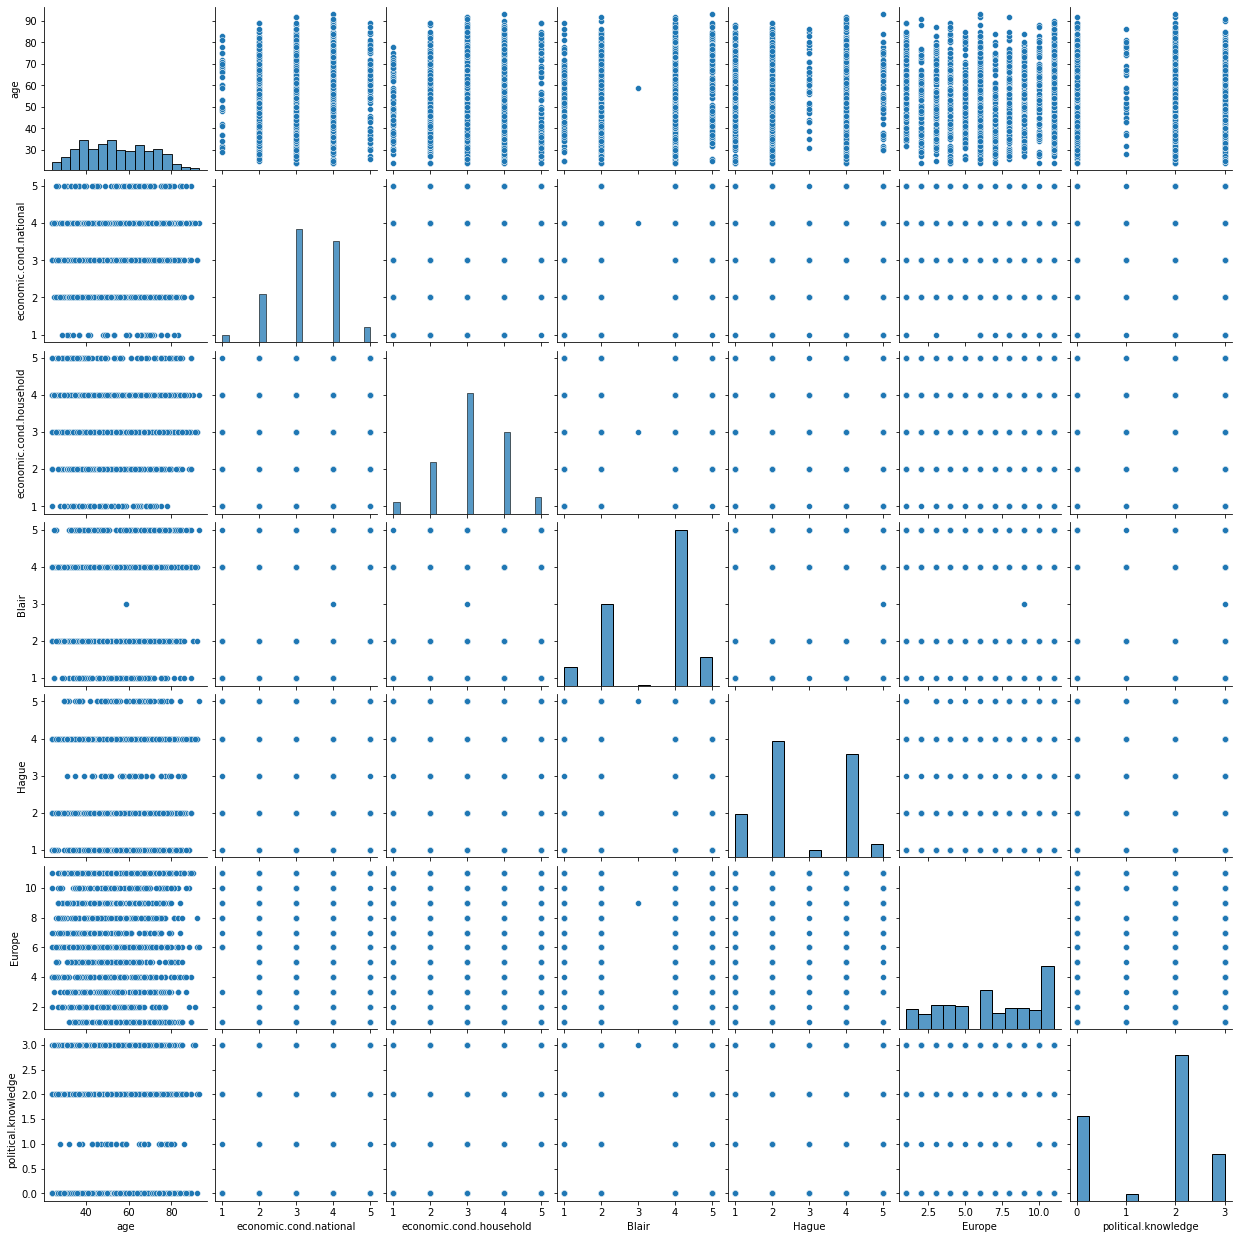

In [537]:
sns.pairplot(data_df)

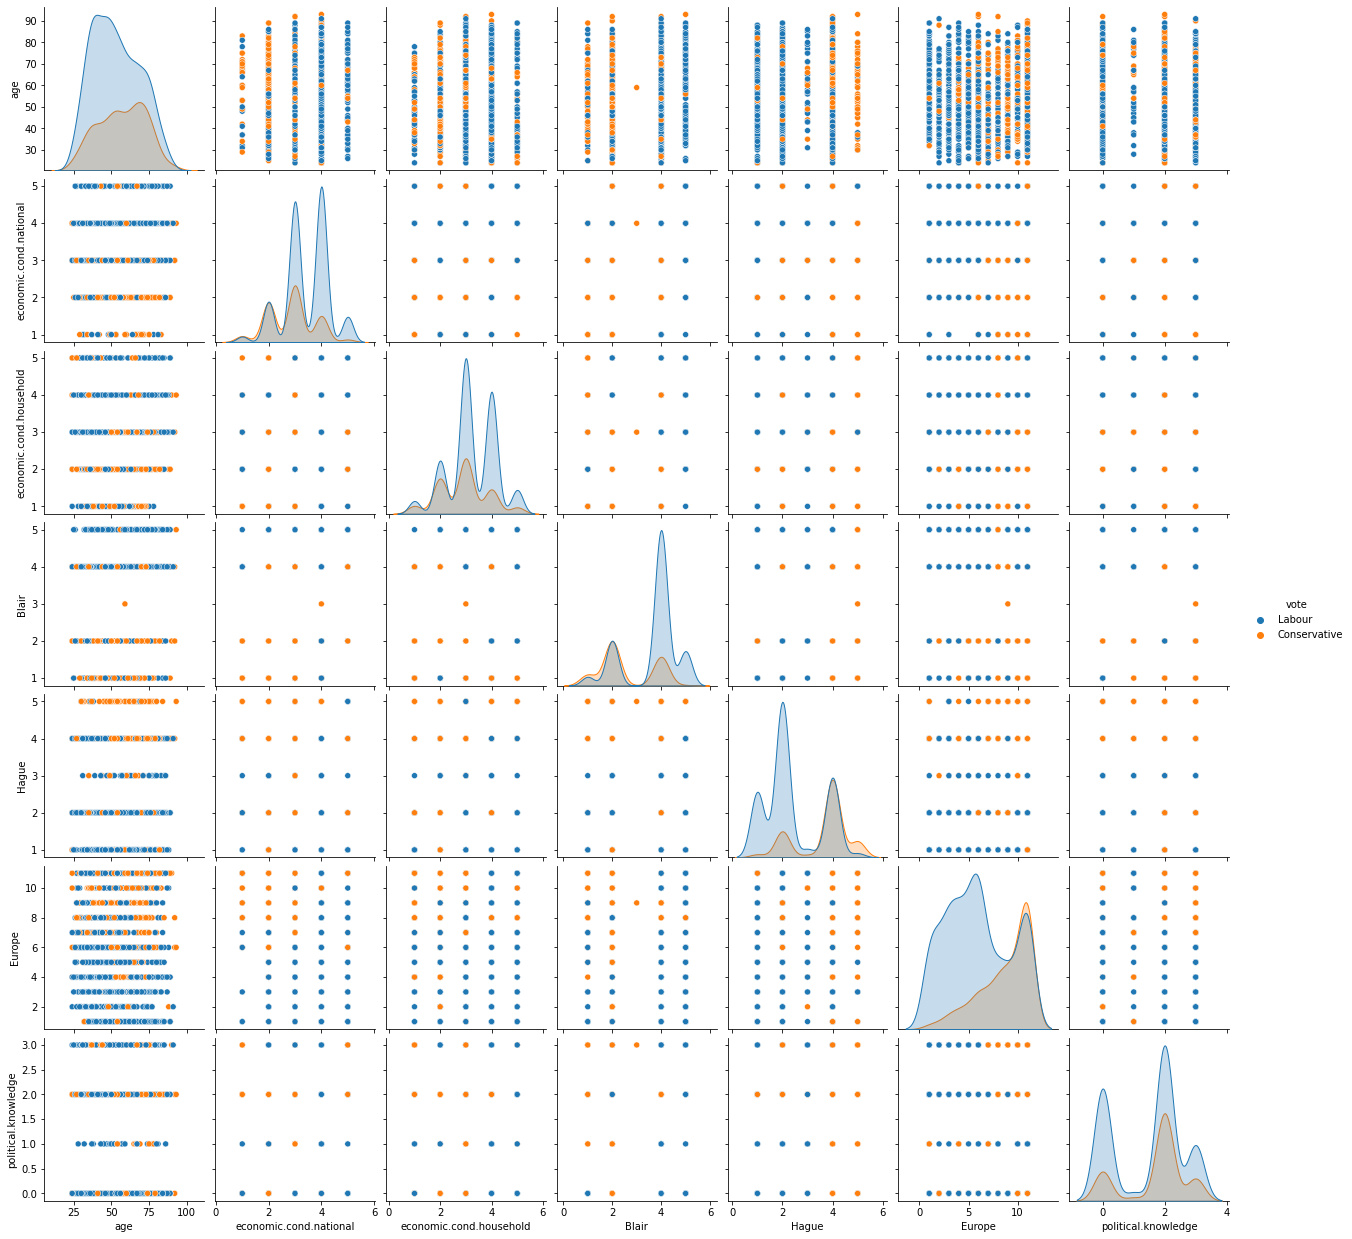

In [538]:
sns.pairplot(data_df, hue='vote')

<AxesSubplot:>

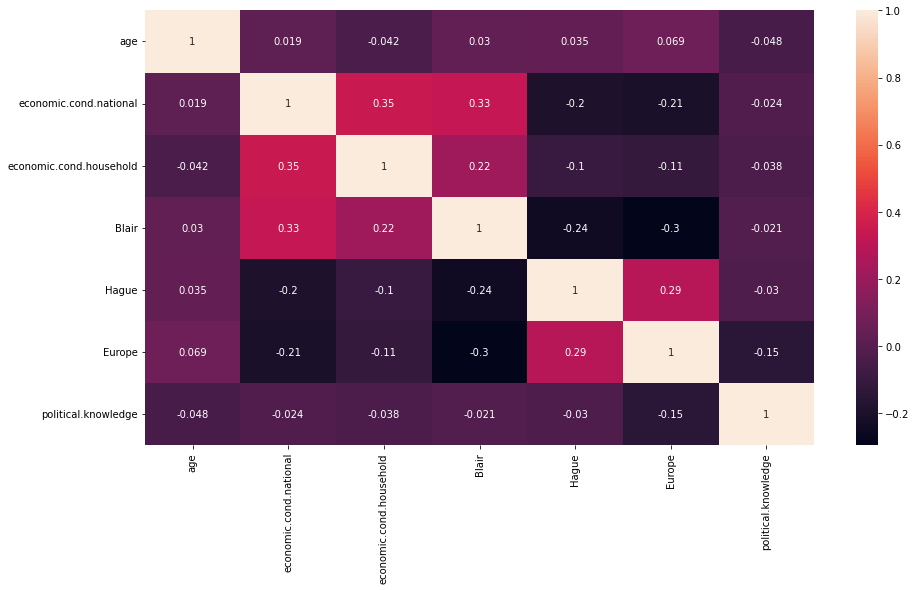

In [539]:
plt.figure(figsize=(15,8))
sns.heatmap(data_df.corr(),annot=True)

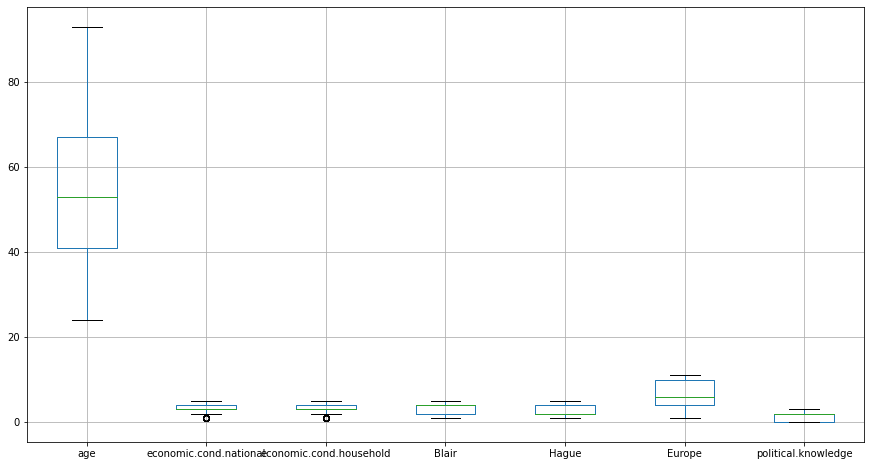

In [540]:
plt.figure(figsize=(15,8))
data_df.boxplot()
plt.show()

<AxesSubplot:>

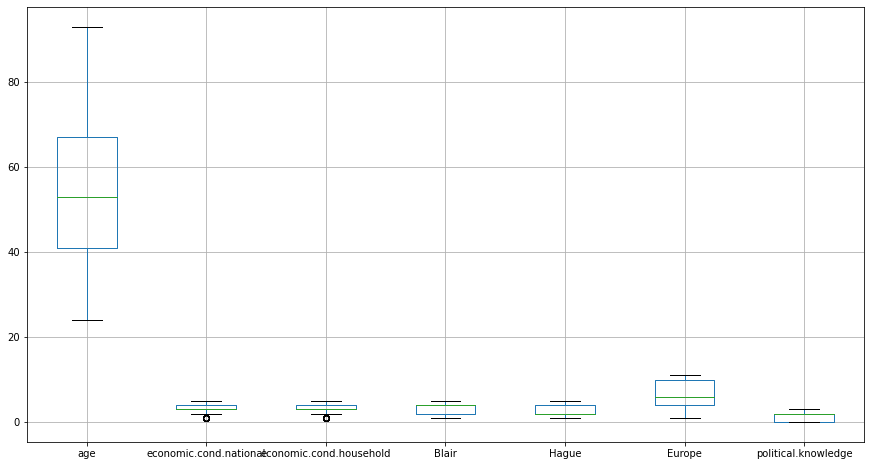

In [541]:
plt.figure(figsize=(15,8))
data_df.boxplot()

In [542]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [543]:
cat1 = ['vote', 'gender']

In [544]:
df =pd.get_dummies(data_df, columns=cat1,drop_first=True)

In [545]:
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [34]:
df= df.rename(columns={'vote_Labour':'IsLabour_or_not' ,'gender_male':'IsMale_or_not'},inplace= False)


In [292]:
df.sample(10)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsLabour_or_not,IsMale_or_not
1104,49,4,3,4,2,8,2,1,1
1081,43,4,4,2,3,5,0,1,1
253,32,3,2,5,1,3,2,1,0
984,39,4,5,5,4,6,2,1,0
1012,67,3,4,4,4,4,1,0,0
1515,82,2,2,2,1,11,2,0,0
239,74,4,4,5,1,9,0,1,0
989,81,3,3,4,4,10,2,0,0
629,81,1,3,4,2,11,1,1,0
1382,75,5,5,5,2,1,2,1,1


## Naive Bayes

In [293]:
X=df.drop('IsLabour_or_not',axis=1)
Y=df['IsLabour_or_not']

In [294]:
X_train,X_test, Y_train, Y_test=train_test_split(X,Y,train_size=0.70, random_state=1)

In [295]:
NB_model=GaussianNB()
NB_model.fit(X_train, Y_train)

GaussianNB()

In [296]:
Y_train_predict=NB_model.predict(X_train)
model_score=NB_model.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train,Y_train_predict))

print(metrics.classification_report(Y_train,Y_train_predict))

0.8331771321462043
[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



the auc 0.886 


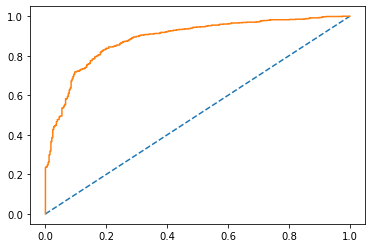

In [297]:
probs_train=NB_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [298]:
Y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test,Y_test_predict))

print(metrics.classification_report(Y_test,Y_test_predict))

0.8253275109170306
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



the auc curve 0.885 


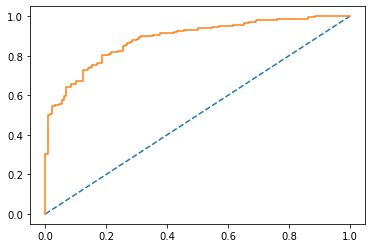

In [299]:
probs_test=NB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

## KNN

In [300]:
x=df.drop('IsLabour_or_not',axis=1)
Y=df['IsLabour_or_not']

In [301]:
x.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsMale_or_not
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [302]:
x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','IsMale_or_not']]=x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','IsMale_or_not']].apply(zscore)


In [303]:
x.head(10)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsMale_or_not
0,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,0.422643,-0.937059
1,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,0.422643,1.067169
2,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,0.422643,1.067169
3,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059
4,-0.839313,-1.414704,-1.226625,-1.987695,-1.419886,-0.221002,0.422643,1.067169
5,-0.457295,-0.279218,0.924730,0.566716,1.018544,-0.827714,0.422643,1.067169
6,0.179402,-1.414704,-1.226625,0.566716,1.018544,1.295778,0.422643,1.067169
7,1.452797,-0.279218,0.924730,0.566716,-1.419886,-1.737782,-1.424148,1.067169
8,-0.966652,-0.279218,-0.150948,0.566716,1.018544,1.295778,-1.424148,-0.937059
9,1.007109,-0.279218,-1.226625,1.418187,-1.419886,1.295778,0.422643,1.067169


In [304]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,Y, random_state=1)

In [305]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [306]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)

In [307]:
print(KNN_model_score)

0.8678915135608049


In [308]:
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

[[263  88]
 [ 63 729]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       351
           1       0.89      0.92      0.91       792

    accuracy                           0.87      1143
   macro avg       0.85      0.83      0.84      1143
weighted avg       0.87      0.87      0.87      1143



## AUC ROC Curve KNN Train

the auc 0.932 


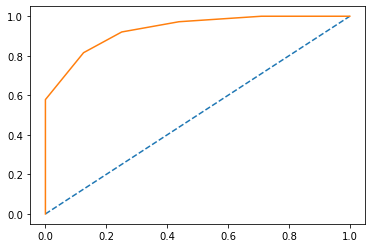

In [309]:
probs_train=KNN_model.predict_proba(x_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [310]:
y_test_predict=KNN_model.predict(x_test)

KNN_model_score=KNN_model.score(x_test, y_test)

print(KNN_model_score)

0.824607329842932


In [311]:
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

[[ 81  30]
 [ 37 234]]
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       111
           1       0.89      0.86      0.87       271

    accuracy                           0.82       382
   macro avg       0.79      0.80      0.79       382
weighted avg       0.83      0.82      0.83       382



## AUC ROC Curve KNN Test

the auc curve 0.870 


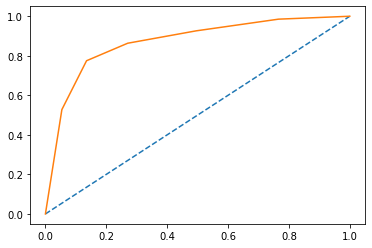

In [312]:
probs_test=KNN_model.predict_proba(x_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

In [313]:
KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [314]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8530183727034121
[[253  98]
 [ 70 722]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       351
           1       0.88      0.91      0.90       792

    accuracy                           0.85      1143
   macro avg       0.83      0.82      0.82      1143
weighted avg       0.85      0.85      0.85      1143



In [315]:
y_test_predict=KNN_model.predict(x_test)
KNN_model_score=KNN_model.score(x_test,y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8350785340314136
[[ 84  27]
 [ 36 235]]
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       111
           1       0.90      0.87      0.88       271

    accuracy                           0.84       382
   macro avg       0.80      0.81      0.80       382
weighted avg       0.84      0.84      0.84       382



In [316]:
KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [317]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8678915135608049
[[263  88]
 [ 63 729]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       351
           1       0.89      0.92      0.91       792

    accuracy                           0.87      1143
   macro avg       0.85      0.83      0.84      1143
weighted avg       0.87      0.87      0.87      1143



In [318]:
y_test_predict=KNN_model.predict(x_test)
KNN_model_score=KNN_model.score(x_test,y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.824607329842932
[[ 81  30]
 [ 37 234]]
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       111
           1       0.89      0.86      0.87       271

    accuracy                           0.82       382
   macro avg       0.79      0.80      0.79       382
weighted avg       0.83      0.82      0.83       382



In [319]:
ac_score=[]

for k in range(1,20,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    scores=knn.score(x_test,y_test)
    ac_score.append(scores)
    
MCE=[1-x for x in ac_score]
MCE

[0.23298429319371727,
 0.19633507853403143,
 0.17539267015706805,
 0.16492146596858637,
 0.17801047120418845,
 0.17277486910994766,
 0.17539267015706805,
 0.18586387434554974,
 0.17801047120418845,
 0.17277486910994766]

## AUC ROC curve after n classifier for train data set

the auc curve 0.904 


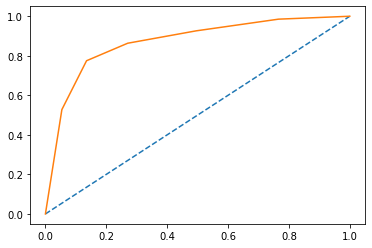

In [320]:
probs_train=knn.predict_proba(x_train)
probs_train=probs_train[:,1]
auc=roc_auc_score(y_train,probs_train)
print("the auc curve %.3f " % auc)

train_fpr,train_tpr,train_threshold=roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

## AUC ROC curve after n classifier for test data set

the auc curve 0.900 


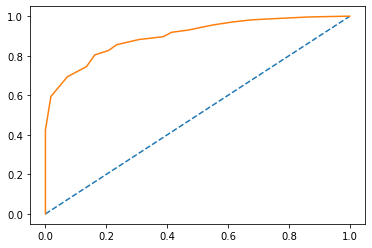

In [321]:
probs_test=knn.predict_proba(x_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

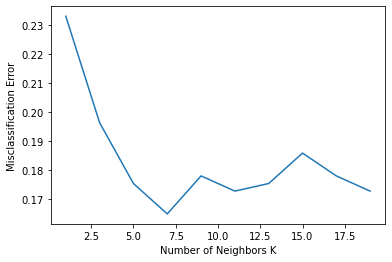

In [322]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

## Discriminant Analysis

In [323]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [324]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

In [325]:
y_train_predict=LDA_model.predict(X_train)
LDA_model_score=LDA_model.score(X_train,Y_train)
print(LDA_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8369259606373008
[[233  99]
 [ 75 660]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



## AUC ROC curve for LDA Train

the auc 0.889 


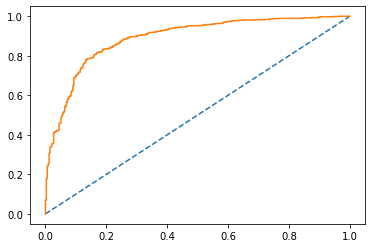

In [326]:
probs_train=LDA_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [327]:
y_test_predict=LDA_model.predict(X_test)
LDA_model_score=LDA_model.score(X_test,Y_test)
print(LDA_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.8187772925764192
[[ 86  44]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



## AUC ROC curve for LDA Test

the auc curve 0.884 


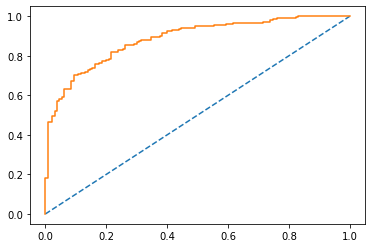

In [328]:
probs_test=LDA_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)


## Logistic Regression

In [329]:
from sklearn.linear_model import LogisticRegression

In [330]:
Logistic_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
Logistic_model.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.4s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [331]:
y_train_predict=Logistic_model.predict(X_train)
Logistic_model_score=Logistic_model.score(X_train,Y_train)
print(Logistic_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8406747891283973
[[230 102]
 [ 68 667]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [332]:
y_train_prob=Logistic_model.predict_proba(X_train)
pd.DataFrame(y_train_prob).head()

,0,1
0,0.616214,0.383786
1,0.186461,0.813539
2,0.187993,0.812007
3,0.163937,0.836063
4,0.052483,0.947517


In [333]:
Logistic_model.score(X_train,Y_train)

0.8406747891283973

## AUC ROC curve for Logistic Regression Train

AUC: 0.889


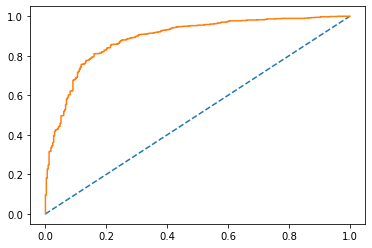

In [334]:
# predict probabilities
probs = Logistic_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [335]:
y_test_predict=Logistic_model.predict(X_test)
Logistic_model_score=Logistic_model.score(X_test,Y_test)
print(Logistic_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.8231441048034934
[[ 85  45]
 [ 36 292]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [336]:
y_test_prob=Logistic_model.predict_proba(X_test)
pd.DataFrame(y_test_prob).head()

,0,1
0,0.933649,0.066351
1,0.689194,0.310806
2,0.333481,0.666519
3,0.477407,0.522593
4,0.157152,0.842848


## AUC ROC curve for Logistic Regression Test

AUC: 0.882


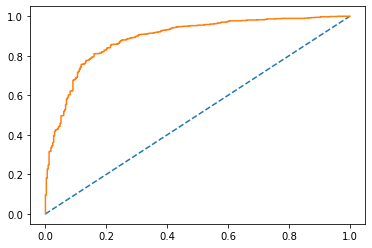

In [337]:
probs_test = Logistic_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);

## Bagging Train

In [338]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test= train_test_split(X,Y,test_size=0.30,random_state=1)

In [339]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [340]:
cart=DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100, random_state=1)

Bagging_model.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [341]:
y_train_predict=Bagging_model.predict(X_train)
Bagging_model_score=Bagging_model.score(X_train,Y_train)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.9990627928772259
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



## AUC _ROC Curve Bagging Train

AUC: 1.000


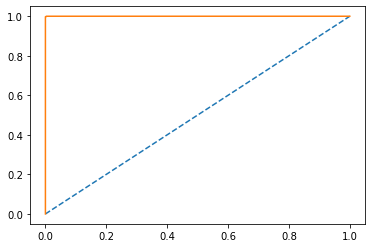

In [342]:
probs = Bagging_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

## Bagging Test

In [343]:
y_test_predict=Bagging_model.predict(X_test)
Bagging_model_score=Bagging_model.score(X_test,Y_test)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.7969432314410481
[[ 83  47]
 [ 46 282]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       130
           1       0.86      0.86      0.86       328

    accuracy                           0.80       458
   macro avg       0.75      0.75      0.75       458
weighted avg       0.80      0.80      0.80       458



## AUC _ROC Curve Bagging Test

AUC: 0.877


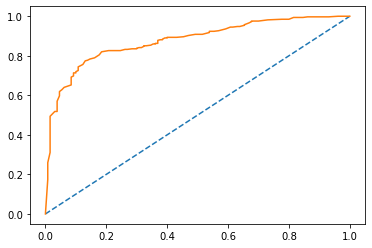

In [344]:
probs_test = Bagging_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

## Boosting Train - Ada Boost

In [345]:
from sklearn.ensemble import AdaBoostClassifier

In [346]:
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [347]:
y_train_predict=ADB_model.predict(X_train)
ADB_model_score=ADB_model.score(X_train,Y_train)
print(ADB_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8472352389878163
[[238  94]
 [ 69 666]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



AUC: 0.913


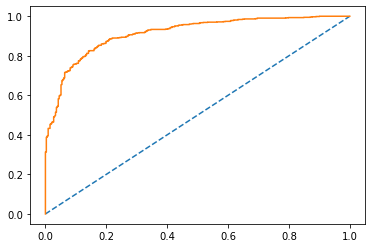

In [348]:
probs = ADB_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

## Gradient Boosting

In [349]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(random_state=1)
gbc_model.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=1)

In [350]:
y_train_predict = gbc_model.predict(X_train)
gbc_model_score = gbc_model.score(X_train, Y_train)
print(gbc_model_score)
print(metrics.confusion_matrix(Y_train, Y_train_predict))
print(metrics.classification_report(Y_train, y_train_predict))

0.8865979381443299
[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



## AUC _ROC Curve Boosting Train

AUC: 0.950


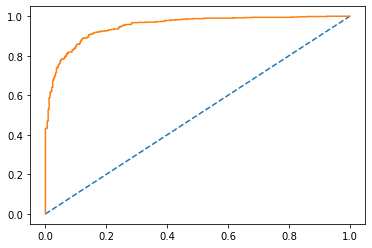

In [351]:
probs = gbc_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

## ADA Boosting Test

In [352]:
y_test_predict = ADB_model.predict(X_test)
ADB_model_score = ADB_model.score(X_test, Y_test)
print(ADB_model_score)
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.8187772925764192
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



## AUC _ROC Curve Boosting Test

AUC: 0.879


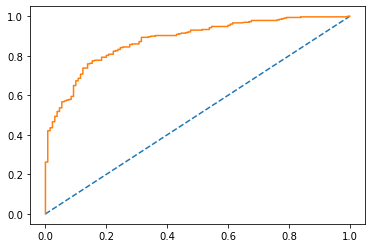

In [353]:
probs_test = ADB_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

## Gradient Boosting Test

In [354]:
y_test_predict = gbc_model.predict(X_test)
gbc_model_score = gbc_model.score(X_test, Y_test)
print(gbc_model_score)
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.8318777292576419
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



## Gradient Boosting AUC_ROC Curve Test

AUC: 0.904


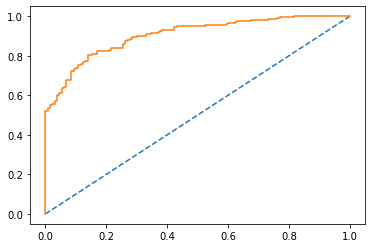

In [546]:
probs_test = gbc_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)

# Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941

President John F. Kennedy in 1961

President Richard Nixon in 1973

In [735]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
Roosevelt=inaugural.raw('1941-Roosevelt.txt')
Kennedy=inaugural.raw('1961-Kennedy.txt')
Nixon=inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/balask/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [701]:
#get the length of the data
number_of_characters = len(Roosevelt)

print('Number of characters in Roosevelt file :', number_of_characters)

number_of_characters = len(Kennedy)

print('Number of characters in Kennedy file :', number_of_characters)

number_of_characters = len(Nixon)

print('Number of characters in Nixon file :', number_of_characters)

Number of characters in Roosevelt file : 7571
Number of characters in Kennedy file : 7618
Number of characters in Nixon file : 9991


In [896]:
# number of words in Kennedy

x=inaugural.raw('1961-Kennedy.txt')
words=x.split()
print('number of words in Kennedy file:',len(words))

number of words in Kennedy file: 1390


In [897]:
# number of words in Nixon

x=inaugural.raw('1973-Nixon.txt')
words=x.split()
print('number of words in Kennedy file:',len(words))

number of words in Kennedy file: 1819


In [898]:
# number of words in Roosevelt

x=inaugural.raw('1941-Roosevelt.txt')
words=x.split()
print('number of words in Kennedy file:',len(words))

number of words in Kennedy file: 1360


In [899]:
# Number of sentence in Nixon

y=pd.DataFrame({'txt':inaugural.raw('1973-Nixon.txt')},index=[0])
y['sentences']=y['txt'].apply(lambda x: len([x for x in x.split() if x.endswith('.')]))
y

,txt,sentences
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",68


In [900]:
# Number of sentence in Kennedy

y=pd.DataFrame({'txt':inaugural.raw('1961-kennedy.txt')},index=[0])
y['sentences']=y['txt'].apply(lambda x: len([x for x in x.split() if x.endswith('.')]))
y

,txt,sentences
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",52


In [949]:
# Number of sentence in Roosevelt

y=pd.DataFrame({'txt':inaugural.raw('1941-Roosevelt.txt')},index=[0])
y['sentences']=y['txt'].apply(lambda x: len([x for x in x.split() if x.endswith('.')]))
y

,txt,sentences
0,On each national day of inauguration since 178...,67


In [950]:
index = ['1941-Roosevelt','1961-Kennedy','1973-Nixon']
DF=pd.DataFrame({'president':['Roosevelt - 1941','Kennedy - 1961','Nixon - 1973'],
                 'Speech':[inaugural.raw('1941-Roosevelt.txt'),
                                       inaugural.raw('1961-Kennedy.txt'),
                                       inaugural.raw('1973-Nixon.txt')]},index=index)

In [951]:
DF['word_count'] = DF['Speech'].apply(lambda x: len(str(x).split(" ")))
DF

,president,Speech,word_count
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,1323
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769


In [952]:
DF['char_count'] = DF['Speech'].str.len()
DF

,president,Speech,word_count,char_count
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,1323,7571
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364,7618
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769,9991


In [953]:
from nltk.tokenize import sent_tokenize
DF['sents_count'] = DF['Speech'].apply(lambda x: len(sent_tokenize(x)))
DF

,president,Speech,word_count,char_count,sents_count
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,1323,7571,68
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364,7618,52
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769,9991,68


In [948]:
from nltk.corpus import stopwords

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/balask/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [913]:
stop.sort()

In [915]:
stop[0:5]

['a', 'about', 'above', 'after', 'again']

In [916]:
DF['Processed_Speech']=DF['Speech'].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [917]:
DF

,president,Speech,word_count,char_count,sents_count,Processed_Speech
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,1323,7571,68,on each national day of inauguration since 178...
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364,7618,52,"vice president johnson, mr. speaker, mr. chief..."
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769,9991,68,"mr. vice president, mr. speaker, mr. chief jus..."


In [918]:
DF['Processed_Speech']=DF['Processed_Speech'].str.replace('[^a-zA-Z\s]','')

/var/folders/0f/l_gpn8zs23g2ks0py8f54x9c0000gn/T/ipykernel_77200/1344401216.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  DF['Processed_Speech']=DF['Processed_Speech'].str.replace('[^a-zA-Z\s]','')


In [920]:
DF

,president,Speech,word_count,char_count,sents_count,Processed_Speech
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,1323,7571,68,on each national day of inauguration since th...
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364,7618,52,vice president johnson mr speaker mr chief jus...
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769,9991,68,mr vice president mr speaker mr chief justice ...


In [921]:
DF['Stop_Count']=DF['Processed_Speech'].apply(lambda x: len([x for x in x.split() if x in stop]))

In [922]:
DF

,president,Speech,word_count,char_count,sents_count,Processed_Speech,Stop_Count
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,1323,7571,68,on each national day of inauguration since th...,711
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364,7618,52,vice president johnson mr speaker mr chief jus...,672
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769,9991,68,mr vice president mr speaker mr chief justice ...,969


In [924]:
DF['Processed_Speech']=DF['Processed_Speech'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))

In [925]:
DF

,president,Speech,word_count,char_count,sents_count,Processed_Speech,Stop_Count
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,1323,7571,68,national day inauguration since people renewed...,711
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364,7618,52,vice president johnson mr speaker mr chief jus...,672
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769,9991,68,mr vice president mr speaker mr chief justice ...,969


In [927]:
DF['Word_Count_after_remove_stop_words']=DF['Processed_Speech'].apply(lambda x: len(str(x).split()))

In [929]:
DF

,president,Speech,word_count,char_count,sents_count,Processed_Speech,Stop_Count,Word_Count_after_remove_stop_words
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,1323,7571,68,national day inauguration since people renewed...,711,623
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364,7618,52,vice president johnson mr speaker mr chief jus...,672,691
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769,9991,68,mr vice president mr speaker mr chief justice ...,969,832


In [931]:
Roosevelt_df=pd.Series(''.join(DF['Processed_Speech'][0]).split()).value_counts()[:10]

In [933]:
Roosevelt_df

nation       11
know         10
spirit        9
democracy     9
life          8
us            8
america       7
people        7
years         6
freedom       6
dtype: int64

In [938]:
Kennedy_df=pd.Series(''.join(DF['Processed_Speech'][1]).split()).value_counts()[:10]

In [941]:
Kennedy_df

let         16
us          12
world        8
sides        8
pledge       7
new          7
citizens     5
power        5
nations      5
shall        5
dtype: int64

In [942]:
Nixon_df=pd.Series(''.join(DF['Processed_Speech'][2]).split()).value_counts()[:10]

In [944]:
Nixon_df

us                26
let               22
peace             19
world             16
new               15
america           13
responsibility    11
government        10
home               9
great              9
dtype: int64

In [946]:
newstopwords=['let','know','us','sides']
stop.extend(newstopwords)

In [955]:
DF

,president,Speech,word_count,char_count,sents_count
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,1323,7571,68
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364,7618,52
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769,9991,68


In [1]:
!pip install wordcloud

In [2]:
conda install -c conda-forge wordcloud=1.6.0

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - wordcloud=1.6.0 -> python[version='>=2.7,<2.8.0a0|>=3.8,<3.9.0a0|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0']

Your python: python=3.9

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
change your python version to a different minor version unless you exp

In [4]:
from wordcloud import WordCloud,STOPWORDS
words = ' '.join(DF.iloc[0:1,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'rainbow',
                      width=4000,
                      height=3000
                     ).generate(words)
plt.figure(1,figsize=(15, 20))
plt.title("Word Cloud for Roosewelt after cleaning",fontsize=15)
print("Word Cloud for Roosewelt after cleaning")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [3]:
words = ' '.join(DF.iloc[1:2,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'seismic_r',
                      width=4000,
                      height=3000
                     ).generate(words)
plt.figure(1,figsize=(15, 20))
plt.title("Word Cloud for Kennedy  after cleaning",fontsize=15)
print("Word Cloud for Kennedy after cleaning")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

NameError: name 'DF' is not defined

In [5]:
words = ' '.join(DF.iloc[2:3,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'plasma',
                      width=4000,
                      height=3000
                     ).generate(words)
plt.figure(1,figsize=(15, 10))
plt.title("Word Cloud for Nixon  after cleaning",fontsize=15)
print("Word Cloud for Nixon after cleaning")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

NameError: name 'DF' is not defined